<a href="https://colab.research.google.com/github/bzizmza/Final-Project-Recommendation-System/blob/main/FinalProject_RecommendationSystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project: Recommendation System
**by Abimanyu Sri Setyo**

**About Project**<br>
During the last few decades, with the rise of Youtube, Amazon, Netflix and many other such web services, recommender systems have taken more and more place in our lives. From e-commerce to online advertisement, recommender systems are today unavoidable in our daily online journeys. In a very general way, recommender systems are algorithms aimed at suggesting relevant items to users. Recommender systems are really critical in some industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors.

**About Dataset**<br>
The dataset is publically available on the [Kaggle](https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset) website, and collected by Cai-Nicolas Ziegler in a 4-week crawl (August / September 2004) from the Book-Crossing community with kind permission from Ron Hornbaker, CTO of Humankind Systems. Contains 278,858 users (anonymized but with demographic information) providing 1,149,780 ratings (explicit / implicit) about 271,379 books.

## Table of Contents

>[Final Project: Recommendation System](#scrollTo=wSn1cZsah1Sg)

>>[Table of Contents](#scrollTo=a00X1YD1mmu0)

>>[Data Loading](#scrollTo=h_fkpGsmhyWJ)

>>>[Import Libraries](#scrollTo=GBCcJqAincC0)

>>>[Import Dataset](#scrollTo=DfhQs3pPngkl)

>>[Exploratory Data Analysis](#scrollTo=PQXGQLlaiDnx)

>>>[Variable Description](#scrollTo=QSkcf-KDupGT)

>>>[Drop unneeded data](#scrollTo=LmO9s8iriqnA)

>>>[Handle missing and duplicates values](#scrollTo=_sEd_hs0x1d-)

>>>[Fixed header name](#scrollTo=ZRIN9J-uvwBS)

>>>[Univariate Data Analysis](#scrollTo=98p06kaft_me)

>>>[Multivariate Data Analysis](#scrollTo=2dH-Z6q3APVt)

>>[Model Development with Content Based Filtering](#scrollTo=d3JWEQ39k82r)

>>[Model Development with Collaborative Filtered](#scrollTo=TBgo2k63Ek-r)



## Data Loading
Preparing the dataset for use

### Import Libraries
Import the required libraries

In [1]:
import zipfile

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from tensorflow import keras
from tensorflow.keras import layers

### Import Dataset
Importing datasets, here the datasets used are sourced from [Kaggle](https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset), so installation of the [Kaggle library](https://pypi.org/project/kaggle/) is required.

In [2]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [4]:
! kaggle datasets download arashnic/book-recommendation-dataset

 38% 9.00M/23.8M [00:00<00:00, 94.2MB/s]
100% 23.8M/23.8M [00:00<00:00, 165MB/s] 


In [5]:
local_zip = '/content/book-recommendation-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/book-recommendation')
zip_ref.close()

In [6]:
%cd book-recommendation
%ls

/content/book-recommendation
Books.csv  Ratings.csv  Users.csv


In [7]:
books = pd.read_csv('/content/book-recommendation/Books.csv')
ratings = pd.read_csv('/content/book-recommendation/Ratings.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## Exploratory Data Analysis
Quoted from [algorit.ma](https://algorit.ma/blog/exploratory-data-analysis-2022/), Exploratory Data Analysis covers the critical process of preliminary investigation tests on data to identify patterns, find anomalies, test hypotheses, and check assumptions through summary statistics and graphical (visual) representations.

### Variable Description
Take an in-depth look at what's interesting to see in the dataset.

In [8]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [9]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [10]:
print(ratings.shape)
print(books.shape)

(1149780, 3)
(271360, 8)


### Drop unneeded data
Judging from the dataframe of the rating and books, there are quite a lot, here I only take 10000 rows from the book dataset and 5000 rows for the rating dataset

In [11]:
books = books[:10000]
ratings = ratings[:5000]

### Handle missing and duplicates values
According to [DQLab.id](https://www.dqlab.id/kursus-belajar-data-mengenal-apa-itu-missing-value), missing values will make the data unusable, and it's a shame to throw away important information in many rows just because of 1-2 missing values, so one of the right steps is to fill in the missing values.

In [12]:
# Check NaN values
print ("Sum of\t->\tColumn")
print ("Values")
print ("=======================")
for i in books.columns:
    print (str(books[i].isna().sum()) + "\t->\t" + i)

Sum of	->	Column
Values
0	->	ISBN
0	->	Book-Title
0	->	Book-Author
0	->	Year-Of-Publication
0	->	Publisher
0	->	Image-URL-S
0	->	Image-URL-M
0	->	Image-URL-L


In [13]:
# Check NaN values
print ("Sum of\t->\tColumn")
print ("Values")
print ("=======================")
for i in ratings.columns:
    print (str(ratings[i].isna().sum()) + "\t->\t" + i)

Sum of	->	Column
Values
0	->	User-ID
0	->	ISBN
0	->	Book-Rating


In [14]:
books = books.dropna()
ratings = ratings.dropna()

In [15]:
ratings = ratings.drop_duplicates()
books = books.drop_duplicates()

### Fixed header name

In [16]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [17]:
ratings = ratings.rename(columns={'Book-Rating': 'rating','User-ID':'user_id'})
ratings.head()

,user_id,ISBN,rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [18]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [19]:
books = books.rename(columns={'Book-Title': 'book_title','Book-Author':'book_author','Year-Of-Publication':'year_of_publication','Image-URL-S':'Image_URL_S','Image-URL-M':'Image_URL_M','Image-URL-L':'Image_URL_L'})
books.head()

,ISBN,book_title,book_author,year_of_publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [20]:
ratings[ratings.rating == max(ratings.rating)]
best_booksId = ratings.ISBN[ratings.rating == max(ratings.rating)]
best_booksId = list(dict.fromkeys(best_booksId))

### Univariate Data Analysis
Sourced from the [SanberCode Blog](https://blog.sanbercode.com/docs/materi-eda/univariate-bivariate-multivariate-analysis/), Univariate Analysis is a technique for understanding and exploring data. The prefix 'Uni' means 'one', so univariate analysis is a single feature data analysis.

In [21]:
ratings.head()

,user_id,ISBN,rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


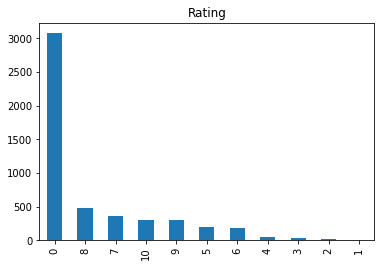

In [22]:
count = ratings["rating"].value_counts()
count.plot(kind='bar', title="Rating");
 
plt.show()

In [23]:
books.head()

,ISBN,book_title,book_author,year_of_publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


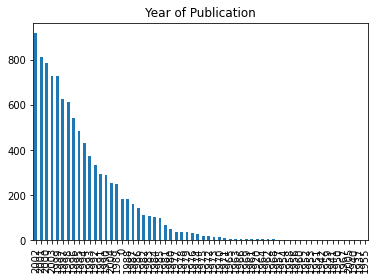

In [24]:
count = books["year_of_publication"].value_counts()
count.plot(kind='bar', title="Year of Publication");
 
plt.show()

### Multivariate Data Analysis

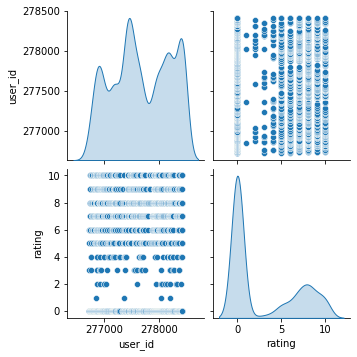

In [25]:
sns.pairplot(ratings, diag_kind = 'kde')

## Model Development with Content Based Filtering

In [26]:
books.shape

(10000, 8)

In [27]:
ratings.shape

(5000, 3)

In [28]:
books.head()

,ISBN,book_title,book_author,year_of_publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


Convert Books dataframe to List

In [29]:
book_ISBN = books['ISBN'].tolist()
book_title = books['book_title'].tolist()
book_author = books['book_author'].tolist()
book_year_of_publication = books['year_of_publication'].tolist()

In [30]:
book = pd.DataFrame({
    'book_ISBN': book_ISBN,
    'book_title': book_title,
    'book_author': book_author,
    'book_year_of_publication': book_year_of_publication
})
book

,book_ISBN,book_title,book_author,book_year_of_publication
0,0195153448,Classical Mythology,Mark P. O. Morford,2002
1,0002005018,Clara Callan,Richard Bruce Wright,2001
2,0060973129,Decision in Normandy,Carlo D'Este,1991
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999
...,...,...,...,...
9995,0380730774,Read This and Tell Me What It Says : Stories (...,A. Manette Ansay,1998
9996,0862418879,The Star Rover,Jack London,2000
9997,340414645X,Die Keltennadel.,Patrick Dunne,2001
9998,3442730988,Tod in der Datscha.,Anna Malyschewa,2003


Get the book author

In [31]:
tf = TfidfVectorizer()
tf.fit(book['book_author']) 
tf.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['aaron',
 'aarsen',
 'abbey',
 'abbott',
 'abby',
 'abelar',
 'abraham',
 'abrahams',
 'abzug',
 'achebe',
 'ackerman',
 'ackroyd',
 'ad',
 'adam',
 'adamo',
 'adams',
 'adamson',
 'addis',
 'adele',
 'adeline',
 'adie',
 'adkins',
 'adler',
 'adrian',
 'adriana',
 'adrienne',
 'africa',
 'agatha',
 'agnes',
 'aguiar',
 'agustã',
 'agut',
 'ahdaf',
 'ahlberg',
 'ahne',
 'aidan',
 'aiden',
 'aiken',
 'aileen',
 'aimee',
 'ainslie',
 'akiba',
 'al',
 'alain',
 'alan',
 'alatas',
 'alba',
 'albanese',
 'albano',
 'albert',
 'alberts',
 'albom',
 'albright',
 'alcock',
 'alcorn',
 'alcott',
 'aldiss',
 'aldous',
 'aldrich',
 'aldrin',
 'alec',
 'aleister',
 'alejandro',
 'alejo',
 'aleksandr',
 'aleramo',
 'alers',
 'alesia',
 'alessandra',
 'alessandro',
 'alex',
 'alexa',
 'alexander',
 'alexandra',
 'alexandre',
 'alfie',
 'alfonsi',
 'alford',
 'alfred',
 'ali',
 'alice',
 'alicia',
 'alien',
 'alighieri',
 'alisa',
 'alison',
 'alistair',
 'alix',
 'aljean',
 'allan',
 'allen',
 'all

Do fit and transform into matrix

In [32]:
tfidf_matrix = tf.fit_transform(book['book_author']) 
tfidf_matrix.shape 

(10000, 5575)

In [33]:
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [34]:
pd.DataFrame(
    tfidf_matrix.todense(), 
    columns=tf.get_feature_names(),
    index=book.book_title
).sample(10, axis=1,replace=True).sample(10, axis=0)

,squire,rose,carrie,stahl,lamour,salonen,jodi,potok,clare,bender
book_title,,,,,,,,,,
"Molly Ivins Can't Say That, Can She?",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
New Cardiff,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Dave Barry's Only Travel Guide You'll Ever Need,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
French Symbolist Poetry,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bet Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Deus Irae,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Mind Cage (Masters of Science Fiction),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Graywolf Annual Two : Short Stories by Women (Graywolf Annual),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Difference Engine,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In the recommendation system, we need to find a way so that the items we recommend are not too far from the central data, therefore we need the degree of similarity on the items, in this project, books with the degree of similarity between books with cosine similarity

In [35]:
cosine_sim = cosine_similarity(tfidf_matrix) 
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [36]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=book['book_title'], columns=book['book_title'])

In [37]:
def author_recommendations(i, M, items, k=5):
    ix = M.loc[:,i].to_numpy().argpartition(range(-1,-k,-1))
    closest = M.columns[ix[-1:-(k+2):-1]]
    closest = closest.drop(i, errors='ignore')
    return pd.DataFrame(closest).merge(items).head(k)

Test book using title "Adventures of Huckleberry Finn (Dover Thrift Editions)"

In [38]:
books_that_have_been_read = "Adventures of Huckleberry Finn (Dover Thrift Editions)"
book[book.book_title.eq(books_that_have_been_read)]

,book_ISBN,book_title,book_author,book_year_of_publication
1532,0486280616,Adventures of Huckleberry Finn (Dover Thrift E...,Mark Twain,1994


In [39]:
recommendations = author_recommendations(books_that_have_been_read, cosine_sim_df, book[['book_title', 'book_author']])

In [40]:
recommendations = recommendations.drop_duplicates()

Featuring 5 recommended books written by the same author.

In [41]:
recommendations 

,book_title,book_author
0,ADVENTURES OF HUCKLEBERRY FINN (ENRICHED CLASS...,Mark Twain
1,Adventures of Huckleberry Finn,Mark Twain
2,The Complete Short Stories of Mark Twain (Bant...,Mark Twain
3,Treasury of Illustrated Classics: Adventures o...,Mark Twain
4,A Connecticut Yankee in King Arthur's Court (D...,Mark Twain


In [42]:
books_that_have_been_read_row = books[books.book_title == books_that_have_been_read]
books_that_have_been_read_author = books_that_have_been_read_row.iloc[0]["book_author"]

In [43]:
book_recommendation_authors = recommendations.book_author

In [44]:
real_author = 0
for i in range(5):
    if book_recommendation_authors[i] == books_that_have_been_read_author:
        real_author+=1

In [45]:
Accuracy = real_author/5*100
print("Accuracy of the model is {}%".format(Accuracy))

Accuracy of the model is 100.0%


## Model Development with Collaborative Filtered

Convert user_id to integer

In [46]:
user_ids = ratings['user_id'].unique().tolist()
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}

Convert book_id to integer

In [47]:
book_ids = ratings['ISBN'].unique().tolist()
book_to_book_encoded = {x: i for i, x in enumerate(book_ids)}
book_encoded_to_book = {i: x for i, x in enumerate(book_ids)}

ratings['user'] = ratings['user_id'].map(user_to_user_encoded)
ratings['book'] = ratings['ISBN'].map(book_to_book_encoded)

Check total users and books

In [48]:
num_users = len(user_encoded_to_user)
print(num_users)
num_book = len(book_encoded_to_book)
print(num_book)

679
4688


Convert ratings to float

In [49]:
ratings['rating'] = ratings['rating'].values.astype(np.float32)

In [50]:
min_rating = min(ratings['rating'])
max_rating = max(ratings['rating'])
 
print('Number of User: {}, Number of Book: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_book, min_rating, max_rating
))

Number of User: 679, Number of Book: 4688, Min Rating: 0.0, Max Rating: 10.0


Split the dataset into train data and validation data

In [51]:
ratings = ratings.sample(frac=1, random_state=42)
ratings

,user_id,ISBN,rating,user,book
1501,277427,0201000822,10.0,255,1470
2586,277639,0453008739,0.0,335,2487
2653,277639,0671509144,0.0,335,2550
1055,277187,0553281089,0.0,170,1041
705,276964,0886774829,8.0,96,696
...,...,...,...,...,...
4426,278418,0061091464,0.0,678,4127
466,276925,3775713328,0.0,80,461
3092,277928,0937247065,7.0,476,2935
3772,278159,0385318073,5.0,574,3549


In [52]:
x = ratings[['user', 'book']].values
 
y = ratings['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
 
train_indices = int(0.70 * ratings.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)
 
print(x, y)

[[ 255 1470]
 [ 335 2487]
 [ 335 2550]
 ...
 [ 476 2935]
 [ 574 3549]
 [ 139  850]] [1.  0.  0.  ... 0.7 0.5 0.5]


Training the Model

In [53]:
import tensorflow as tf

class RecommenderNet(tf.keras.Model):
 
  def __init__(self, num_users, num_book, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_book = num_book
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding(
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1)
    self.book_embedding = layers.Embedding( 
        num_book,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.book_bias = layers.Embedding(num_book, 1) 
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0])
    user_bias = self.user_bias(inputs[:, 0])
    book_vector = self.book_embedding(inputs[:, 1])
    book_bias = self.book_bias(inputs[:, 1]) 
 
    dot_user_book = tf.tensordot(user_vector, book_vector, 2) 
 
    x = dot_user_book + user_bias + book_bias
    
    return tf.nn.sigmoid(x) 

In [54]:
model = RecommenderNet(num_users, num_book, 50)

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [55]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 5,
    epochs = 20,
    validation_data = (x_val, y_val),
)

Epoch 1/20
700/700 [==============================] - 12s 8ms/step - loss: 0.6629 - root_mean_squared_error: 0.4185 - val_loss: 0.6418 - val_root_mean_squared_error: 0.4102
Epoch 2/20
700/700 [==============================] - 5s 7ms/step - loss: 0.5752 - root_mean_squared_error: 0.3664 - val_loss: 0.6148 - val_root_mean_squared_error: 0.3942
Epoch 3/20
700/700 [==============================] - 3s 4ms/step - loss: 0.5286 - root_mean_squared_error: 0.3425 - val_loss: 0.5994 - val_root_mean_squared_error: 0.3855
Epoch 4/20
700/700 [==============================] - 3s 4ms/step - loss: 0.5035 - root_mean_squared_error: 0.3267 - val_loss: 0.5849 - val_root_mean_squared_error: 0.3775
Epoch 5/20
700/700 [==============================] - 3s 4ms/step - loss: 0.4840 - root_mean_squared_error: 0.3153 - val_loss: 0.5729 - val_root_mean_squared_error: 0.3713
Epoch 6/20
700/700 [==============================] - 3s 4ms/step - loss: 0.4611 - root_mean_squared_error: 0.3005 - val_loss: 0.5634 - val

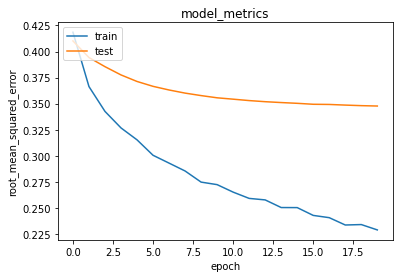

In [56]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Get Recommendation

In [57]:
books =  book
ratings = ratings

In [58]:
user_id = ratings.user_id.sample(1).iloc[0]
books_have_been_read_by_user = ratings[ratings.user_id == user_id]
 
books_have_not_been_read_by_user = books[books['book_ISBN'].isin(books_have_been_read_by_user.ISBN.values)]['book_ISBN'] 
books_have_not_been_read_by_user = list(
    set(books_have_not_been_read_by_user)
    .intersection(set(book_to_book_encoded.keys()))
)
 
books_have_not_been_read_by_user = [[book_to_book_encoded.get(x)] for x in books_have_not_been_read_by_user]
user_encoder = user_to_user_encoded.get(user_id)
user_book_array = np.hstack(
    ([[user_encoder]] * len(books_have_not_been_read_by_user), books_have_not_been_read_by_user)
)

In [59]:
ratings = model.predict(user_book_array).flatten()
 
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_book_ids = [
    book_encoded_to_book.get(books_have_not_been_read_by_user[x][0]) for x in top_ratings_indices
]
 
top_books_recommended = (
    books_have_been_read_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .ISBN.values
)
 
books_row = books[books['book_ISBN'].isin(top_books_recommended)]
for row in books_row.itertuples():
    print(row.book_title, 'by', row.book_author)
 
print('----' * 8)
print('Top 10 Book Recommendation for user: {}'.format(user_id))
print('----' * 8)
 
recommended_books = books[books['book_ISBN'].isin(recommended_book_ids)]
for row in recommended_books.itertuples():
    print(row.book_title,'by', row.book_author)

Politically Correct Bedtime Stories: Modern Tales for Our Life and Times by James Finn Garner
--------------------------------
Top 10 Book Recommendation for user: 277427
--------------------------------
Oryx and Crake by Margaret Atwood
If Only It Were True by Marc Levy
The Fountainhead by Ayn Rand
The Murder Book by Jonathan Kellerman
Politically Correct Bedtime Stories: Modern Tales for Our Life and Times by James Finn Garner
Saving Faith by David Baldacci
Harry Potter and the Prisoner of Azkaban (Book 3) by J. K. Rowling
Harmful Intent by Robin Cook
Hemlock Bay by Catherine Coulter
Doomsday Book by Connie Willis
